<a href="https://colab.research.google.com/github/Vale150299/ARS/blob/main/METRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# connect google drive where datasets are stored
import os, sys
from google.colab import drive
drivedir='/content/drive'
drive.mount(drivedir)
os.chdir(drivedir)

Mounted at /content/drive


In [3]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00


In [4]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [5]:
datadir=drivedir+'/MyDrive/METERS/2024METRS_project_data/juelich/'
libsdir_path=drivedir+'/MyDrive/METERS/2024METRS_project_data/juelich/'
print (os.listdir(datadir))

['cloudnet_lwp', 'cloudnet_iwc', 'surface_rad', 'cloudnet_class']


In [6]:
import os

# Assuming datadir is already defined
surface_rad_dir = os.path.join(datadir, 'surface_rad')

# List the contents of the cloudnet_iwc directory
surface_rad_contents = os.listdir(surface_rad_dir)

# Print the contents
print(surface_rad_contents)

['sups_joy_pyr00_l1_rsds_v01_20230111000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230105000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230110000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230107000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230106000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230108000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230102000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230101000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230109000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230103000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230104000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230121000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230113000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230115000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230201000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230117000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230112000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230114000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230128000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230130000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230129000

In [ ]:
import os
import xarray as xr

# Assuming datadir is already defined
surface_rad_dir = os.path.join(datadir, 'surface_rad')

# Define the pattern to match the filenames of the NetCDF files you want to open
jue_lw = 'sups_joy_pyrg00_l1_rlds*.nc'

# Use open_mfdataset to open and concatenate the files into a single dataset
jue_lw = xr.open_mfdataset(os.path.join(surface_rad_dir, jue_lw))

# Print the combined dataset to see the structure
print(jue_lw)


<xarray.Dataset>
Dimensions:     (time: 6298538, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:5...
Dimensions without coordinates: nv
Data variables:
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(17280, 2), meta=np.ndarray>
    zsl         (time) int16 111 111 111 111 111 111 ... 111 111 111 111 111 111
    lat         (time) float32 50.91 50.91 50.91 50.91 ... 50.91 50.91 50.91
    lon         (time) float32 6.414 6.414 6.414 6.414 ... 6.414 6.414 6.414
    rlds        (time) float32 dask.array<chunksize=(17280,), meta=np.ndarray>
    rlds_error  (time) float32 dask.array<chunksize=(17280,), meta=np.ndarray>
Attributes:
    Title:            Downwelling long wave irradiance
    Institution:      Research Center Juelich, Institute for Energy and Clima...
    Contact_person:   Birger Bohn (b.bohn@fz-juelich.de)
    Source:           Kipp & Zonen pyrgeometer CGR4
    History:          Data processed by IEK-8 and written

In [ ]:
jue_lw.load()

<xarray.Dataset>
Dimensions:     (time: 6298538, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:5...
Dimensions without coordinates: nv
Data variables:
    time_bnds   (time, nv) datetime64[ns] 2023-01-01T00:00:00.500000 ... 2023...
    zsl         (time) int16 111 111 111 111 111 111 ... 111 111 111 111 111 111
    lat         (time) float32 50.91 50.91 50.91 50.91 ... 50.91 50.91 50.91
    lon         (time) float32 6.414 6.414 6.414 6.414 ... 6.414 6.414 6.414
    rlds        (time) float32 345.2 344.7 344.2 343.5 ... 329.9 329.6 329.1
    rlds_error  (time) float32 9.7 9.7 9.7 9.8 9.8 9.9 ... 7.4 7.5 7.5 7.5 7.5
Attributes:
    Title:            Downwelling long wave irradiance
    Institution:      Research Center Juelich, Institute for Energy and Clima...
    Contact_person:   Birger Bohn (b.bohn@fz-juelich.de)
    Source:           Kipp & Zonen pyrgeometer CGR4
    History:          Data processed by IEK-8 and written with radiation2nc_h...
    Conventions:      CF-1.6 where applicable
    Processing_date:  2023-06-15 17:14:12 (CET)
    Author:           Anne Hirsikko (anne.hirsikko@fmi.fi)
    Comments:          
    License:          For non-commercial use only. This data is subject to th...

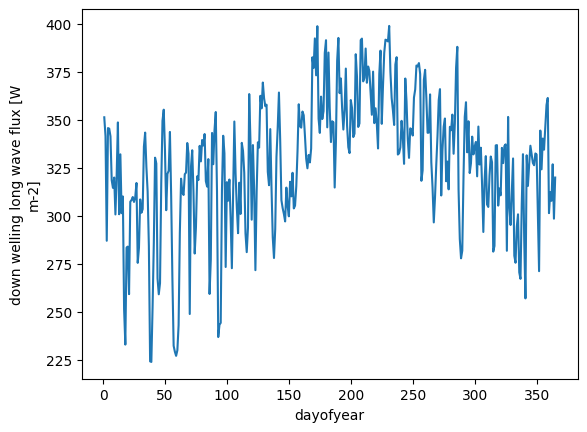

In [ ]:
lw_mean = jue_lw.rlds.groupby('time.dayofyear').mean()
lw_mean.plot()

In [7]:
import os
import xarray as xr

# Assuming datadir is already defined
surface_rad_dir = os.path.join(datadir, 'surface_rad')

# Define the pattern to match the filenames of the NetCDF files you want to open
jue_sw = 'sups_joy_pyr00_l1_rsds*.nc'

# Use open_mfdataset to open and concatenate the files into a single dataset
jue_sw = xr.open_mfdataset(os.path.join(surface_rad_dir, jue_sw))

# Print the combined dataset to see the structure
print(jue_sw)


<xarray.Dataset>
Dimensions:     (time: 6298492, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:5...
Dimensions without coordinates: nv
Data variables:
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(17280, 2), meta=np.ndarray>
    zsl         (time) int16 111 111 111 111 111 111 ... 111 111 111 111 111 111
    lat         (time) float32 50.91 50.91 50.91 50.91 ... 50.91 50.91 50.91
    lon         (time) float32 6.414 6.414 6.414 6.414 ... 6.414 6.414 6.414
    rsds        (time) float32 dask.array<chunksize=(17280,), meta=np.ndarray>
    rsds_error  (time) float32 dask.array<chunksize=(17280,), meta=np.ndarray>
Attributes:
    Title:            Downwelling shortwave irradiance
    Institution:      Research Center Juelich, Institute for Energy and Clima...
    Contact_person:   Birger Bohn (b.bohn@fz-juelich.de)
    Source:           Kipp & Zonen pyranometer CMP21
    History:          Data processed by IEK-8 and writte

In [70]:
import xarray as xr

# Assuming `data` is your xarray Dataset
# Load your dataset into `data`

# Print the time coordinate variable
print(jue_sw['time'])

# Calculate the time interval between each timestamp
time_diff = jue_sw['time'].diff(dim='time')
print(time_diff)


<xarray.DataArray 'time' (time: 6298492)>
array(['2023-01-01T00:00:03.000000000', '2023-01-01T00:00:08.000000000',
       '2023-01-01T00:00:13.000000000', ..., '2023-12-31T23:59:43.000000000',
       '2023-12-31T23:59:48.000000000', '2023-12-31T23:59:53.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:59:53
Attributes:
    standard_name:  time
    long_name:      time
    comments:       mid of averaging period
    bounds:         time_bnds
<xarray.DataArray 'time' (time: 6298491)>
array([5000000000, 5000000000, 5000000000, ..., 5000000000, 5000000000,
       5000000000], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:00:08 ... 2023-12-31T23:59:53


In [ ]:
import xarray as xr

# Assuming `data` is your xarray Dataset
# Load your dataset into `data`

# Print the time coordinate variable
print(jue_lw['time'])

# Calculate the time interval between each timestamp
time_diff = jue_lw['time'].diff(dim='time')
print(time_diff)


<xarray.DataArray 'time' (time: 6298538)>
array(['2023-01-01T00:00:03.000000000', '2023-01-01T00:00:08.000000000',
       '2023-01-01T00:00:13.000000000', ..., '2023-12-31T23:59:43.000000000',
       '2023-12-31T23:59:48.000000000', '2023-12-31T23:59:53.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:59:53
Attributes:
    standard_name:  time
    long_name:      time
    comments:       mid of averaging period
    bounds:         time_bnds
<xarray.DataArray 'time' (time: 6298537)>
array([5000000000, 5000000000, 5000000000, ..., 5000000000, 5000000000,
       5000000000], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:00:08 ... 2023-12-31T23:59:53


In [8]:
jue_sw.load()

<xarray.Dataset>
Dimensions:     (time: 6298492, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:5...
Dimensions without coordinates: nv
Data variables:
    time_bnds   (time, nv) datetime64[ns] 2023-01-01T00:00:00.500000 ... 2023...
    zsl         (time) int16 111 111 111 111 111 111 ... 111 111 111 111 111 111
    lat         (time) float32 50.91 50.91 50.91 50.91 ... 50.91 50.91 50.91
    lon         (time) float32 6.414 6.414 6.414 6.414 ... 6.414 6.414 6.414
    rsds        (time) float32 -0.0 -0.0 -0.0 -0.0 -0.0 ... 0.4 0.4 0.4 0.4 0.4
    rsds_error  (time) float32 3.0 3.0 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0 3.0
Attributes:
    Title:            Downwelling shortwave irradiance
    Institution:      Research Center Juelich, Institute for Energy and Clima...
    Contact_person:   Birger Bohn (b.bohn@fz-juelich.de)
    Source:           Kipp & Zonen pyranometer CMP21
    History:          Data processed by IEK-8 and written with radiation2nc_h...
    Conventions:      CF-1.6 where applicable
    Processing_date:  2023-06-15 17:14:13 (CET)
    Author:           Anne Hirsikko (anne.hirsikko@fmi.fi)
    Comments:          
    License:          For non-commercial use only. This data is subject to th...

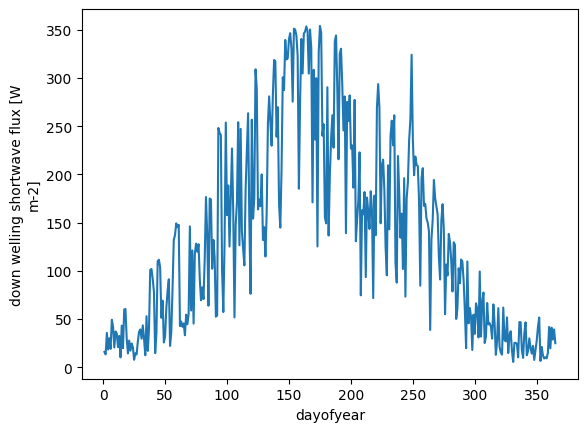

In [9]:
jue_sw_mean = jue_sw.rsds.groupby('time.dayofyear').mean()
jue_sw_mean.plot()

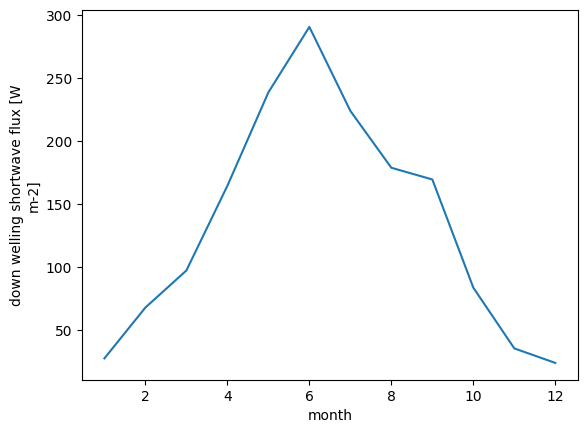

In [78]:
import xarray as xr

# Assuming 'time' is your time coordinate in your xarray dataset
jue_sw_mean_month = jue_sw.rsds.groupby('time.month').mean(dim='time')

# Plotting
jue_sw_mean_month.plot()


open_dataset
Purpose: Opens a single netCDF file.
Usage: Use open_dataset when you have a single netCDF file that you want to load into an xarray dataset:
ds = xarray.open_dataset('path_to_file.nc')

open_mfdataset
Purpose: Opens multiple netCDF files as a single xarray dataset.
Usage: Use open_mfdataset when you have a collection of netCDF files that you want to combine into a single xarray dataset. This is useful for working with time series data split across multiple files:
ds = xarray.open_mfdataset('path_to_files*.nc')

In [10]:
datadir=drivedir+'/MyDrive/METERS/2024METRS_project_data/nyalesund/'
libsdir_path=drivedir+'/MyDrive/METERS/2024METRS_project_data/nyalesund/'
print (os.listdir(datadir))

['cloudnet_iwc', 'cloudnet_lwp', 'cloudnet_class', 'surface_rad']


In [11]:
import os

# Define the path to the surface_rad directory
surface_rad_dir = '/content/drive/MyDrive/METERS/2024METRS_project_data/nyalesund/surface_rad/'

# List files in the surface_rad directory
surface_rad_files = os.listdir(surface_rad_dir)
print(surface_rad_files)


['20230102_NYA_radiation.nc', '20230113_NYA_radiation.nc', '20230105_NYA_radiation.nc', '20230106_NYA_radiation.nc', '20230111_NYA_radiation.nc', '20230101_NYA_radiation.nc', '20230109_NYA_radiation.nc', '20230107_NYA_radiation.nc', '20230112_NYA_radiation.nc', '20230104_NYA_radiation.nc', '20230108_NYA_radiation.nc', '20230103_NYA_radiation.nc', '20230110_NYA_radiation.nc', '20230411_NYA_radiation.nc', '20230314_NYA_radiation.nc', '20230714_NYA_radiation.nc', '20230614_NYA_radiation.nc', '20231011_NYA_radiation.nc', '20231217_NYA_radiation.nc', '20230815_NYA_radiation.nc', '20230710_NYA_radiation.nc', '20230122_NYA_radiation.nc', '20230914_NYA_radiation.nc', '20230312_NYA_radiation.nc', '20230718_NYA_radiation.nc', '20230901_NYA_radiation.nc', '20230115_NYA_radiation.nc', '20230628_NYA_radiation.nc', '20231008_NYA_radiation.nc', '20231231_NYA_radiation.nc', '20230612_NYA_radiation.nc', '20230225_NYA_radiation.nc', '20230919_NYA_radiation.nc', '20230907_NYA_radiation.nc', '20230415_NYA

In [52]:
from netCDF4 import Dataset

# Define the path to the file
file_path = '/content/drive/MyDrive/METERS/2024METRS_project_data/nyalesund/surface_rad/20230102_NYA_radiation.nc'

# Open the NetCDF file
nc_file = Dataset(file_path, 'r')

# Print the contents of the file
print(nc_file)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Citation: Daily ncdf files have been created from Citation:	Maturilli, Marion (2023): Basic and other measurements of radiation at station Ny-Ålesund (2023-01) [dataset]. Alfred Wegener Institute, Helmholtz Centre for Polar and Marine Research, Potsdam, PANGAEA, https://doi.org/10.1594/PANGAEA.957428,  See original file for more information about the instruments.
    dimensions(sizes): temporal_grid(1440)
    variables(dimensions): float32 time(temporal_grid), float32 swd(temporal_grid), float32 swdir(temporal_grid), float32 swdif(temporal_grid), float32 lwd(temporal_grid), float32 swu(temporal_grid), float32 lwu(temporal_grid), float32 T2m(temporal_grid), float32 rh2m(temporal_grid), float32 sfcpres(temporal_grid)
    groups: 


In [54]:
from netCDF4 import Dataset

# Define the path to the file
file_path = '/content/drive/MyDrive/METERS/2024METRS_project_data/nyalesund/surface_rad/20230802_NYA_radiation.nc'

# Open the NetCDF file
nc_file = Dataset(file_path, 'r')

# Access the 'swd' variable data
swd_data = nc_file.variables['swd'][:]

# Close the NetCDF file
nc_file.close()

# Print the data
print(swd_data)


[53. 53. 53. ... 44. 44. 43.]


<ipython-input-54-a75956bb94c8>:10: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  swd_data = nc_file.variables['swd'][:]


In [65]:
from netCDF4 import Dataset
import os
import numpy as np

# Define the directory containing the NetCDF files
directory = '/content/drive/MyDrive/METERS/2024METRS_project_data/nyalesund/surface_rad/'

# Initialize an empty list to store the swd data
swd_data_all = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"): # Check if the file is a NetCDF file
        file_path = os.path.join(directory, filename)
        nc_file = Dataset(file_path, 'r')
        swd_data = nc_file.variables['swd'][:]
        swd_data_all.append(swd_data)
        nc_file.close()

# Concatenate all the swd data arrays along the time dimension
swd_data_concatenated = np.concatenate(swd_data_all, axis=0)

# Print the shape of the concatenated swd data
print("Shape of concatenated swd data:", swd_data_concatenated.shape)


<ipython-input-65-e457a0ce268d>:16: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  swd_data = nc_file.variables['swd'][:]


Shape of concatenated swd data: (525600,)


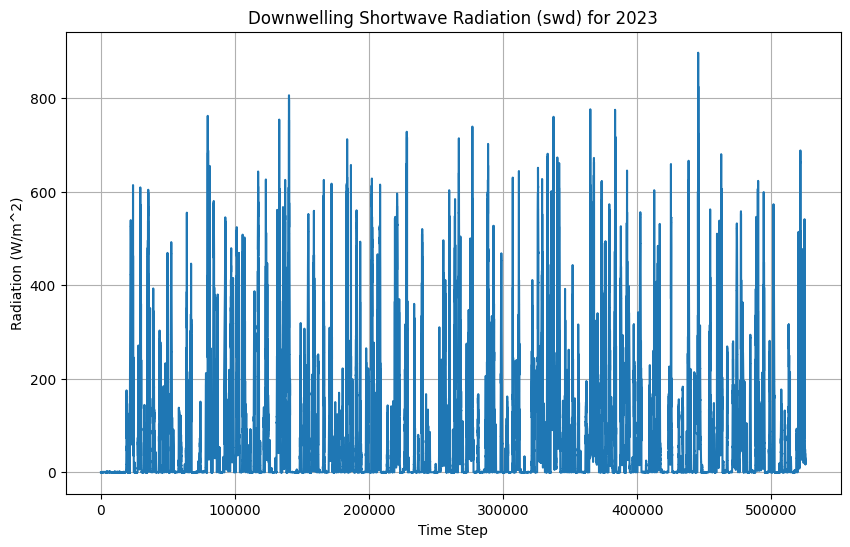

In [68]:
import matplotlib.pyplot as plt

# Plot the swd data
plt.figure(figsize=(10, 6))
plt.plot(swd_data_concatenated)
plt.title('Downwelling Shortwave Radiation (swd) for 2023')
plt.xlabel('Time Step')
plt.ylabel('Radiation (W/m^2)')
plt.grid(True)
plt.show()


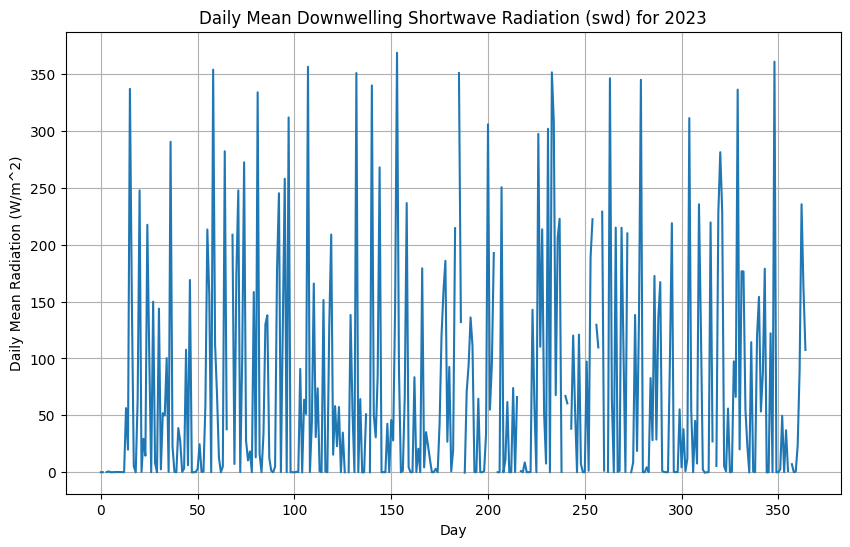

In [69]:
# Reshape the concatenated swd data into a 2D array with shape (number_of_days, minutes_per_day)
swd_data_2d = swd_data_concatenated.reshape(-1, 1440)

# Calculate the mean along the time axis (axis 1) to get daily mean
daily_mean_swd = np.mean(swd_data_2d, axis=1)

# Plot the daily mean swd data
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_swd)
plt.title('Daily Mean Downwelling Shortwave Radiation (swd) for 2023')
plt.xlabel('Day')
plt.ylabel('Daily Mean Radiation (W/m^2)')
plt.grid(True)
plt.show()


Data are recorded every minute, then the 1440 data points might represent the data for a 24-hour period, as there are 24 hours in a day and 60 minutes in an hour, resulting in 24 * 60 = 1440 minutes in a day.

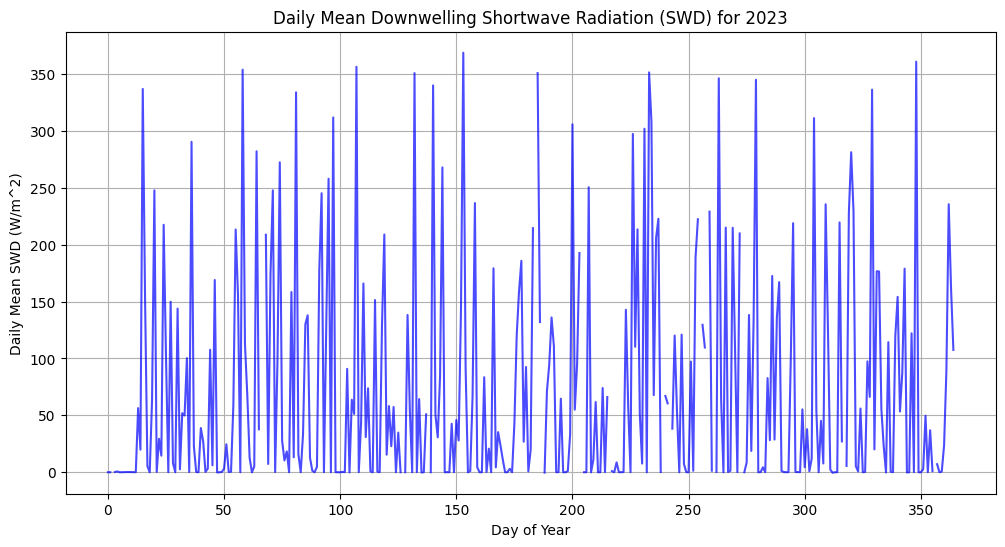

In [67]:
import numpy as np

# Reshape the concatenated swd data into a 2D array (one row per day)
swd_data_2d = swd_data_concatenated.reshape(-1, 1440)  # Assuming each day has 1440 time steps (60 mins/hour * 24 hours)

# Compute the daily mean along the rows
daily_mean_swd = np.mean(swd_data_2d, axis=1)

# Plot the daily mean swd data
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(daily_mean_swd)), daily_mean_swd, color='blue', alpha=0.7)
plt.title('Daily Mean Downwelling Shortwave Radiation (SWD) for 2023')
plt.xlabel('Day of Year')
plt.ylabel('Daily Mean SWD (W/m^2)')
plt.grid(True)
plt.show()


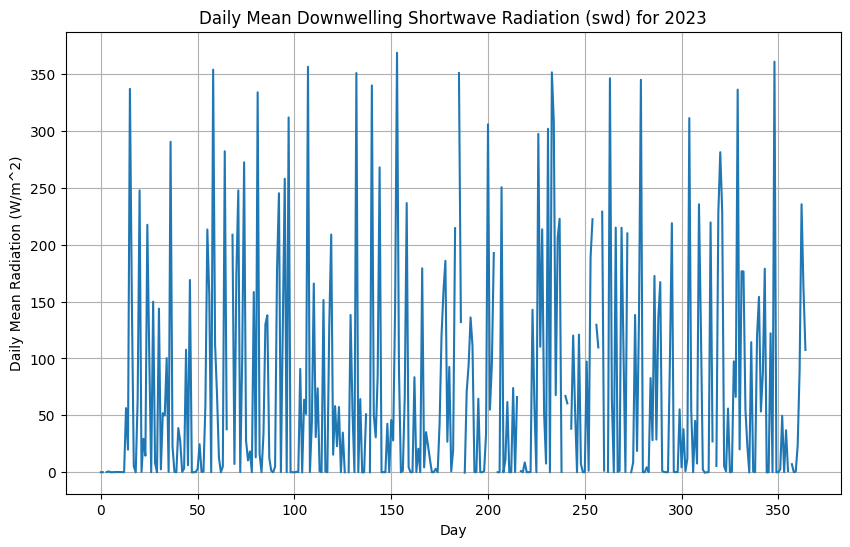

In [74]:
import numpy as np

# Reshape the concatenated swd data into a 2D array with shape (number_of_days, minutes_per_day)
swd_data_2d = swd_data_concatenated.reshape(-1, 1440)

# Calculate the mean along the time axis (axis 1) to get daily mean
daily_mean_swd = np.mean(swd_data_2d, axis=1)

# Plot the daily mean swd data
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_swd)
plt.title('Daily Mean Downwelling Shortwave Radiation (swd) for 2023')
plt.xlabel('Day')
plt.ylabel('Daily Mean Radiation (W/m^2)')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

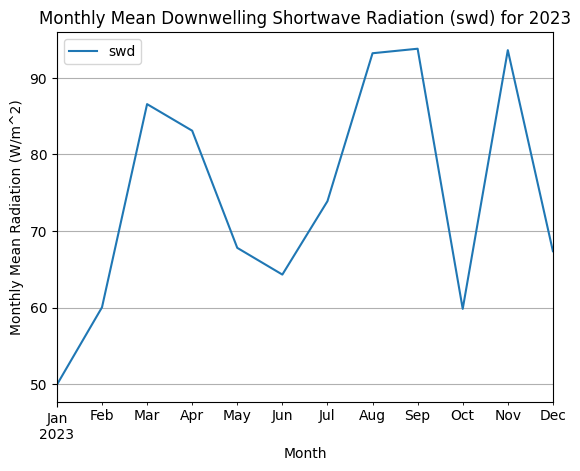

In [79]:
import numpy as np
import pandas as pd

# Reshape the concatenated swd data into a 2D array with shape (number_of_days, minutes_per_day)
swd_data_2d = swd_data_concatenated.reshape(-1, 1440)

# Convert the swd data into a DataFrame with a datetime index
index = pd.date_range(start='2023-01-01', periods=len(swd_data_concatenated), freq='T')
swd_df = pd.DataFrame(swd_data_concatenated, index=index, columns=['swd'])

# Group the data by month and calculate the mean for each month
monthly_mean_swd = swd_df.resample('M').mean()

# Plot the monthly mean swd data
plt.figure(figsize=(10, 6))
monthly_mean_swd.plot()
plt.title('Monthly Mean Downwelling Shortwave Radiation (swd) for 2023')
plt.xlabel('Month')
plt.ylabel('Monthly Mean Radiation (W/m^2)')
plt.grid(True)
plt.show()


-with * you can import all the files with the entire without importing one by one

-mean of the measurements(thousand) of the day

-problem with decimal hours try to fix
computing the max and it shows two peaks  (the max should be in the 21 of june)

-mean hour value for the case of clear sky checking the the smooth curve of sw
looking to lwp and looking also to error of lwp

-looking to temperature and select model height near surface and try transpose

-Radiation data: try to combine save date as datetime

-drop all the variables that we don't need it

-filter the joulich radiation with clear sky time step finding the time step where the detection status = 0 so when ther is clear sky.